<a href="https://colab.research.google.com/github/bpiaple/TensorFlow-Course/blob/main/03_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [1]:
#Import Tensorflow
import tensorflow as tf

print(tf.__version__)

2.15.0


# Creating some data to work with



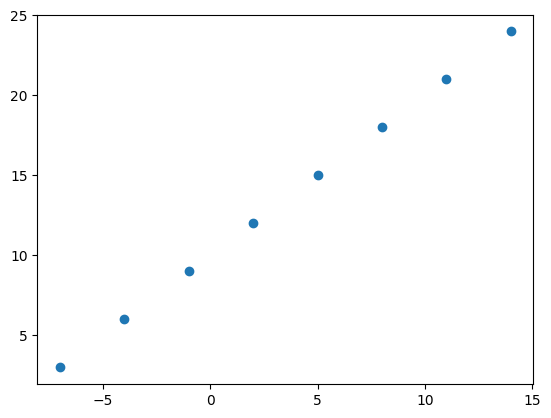

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0], dtype=np.float32)

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0], dtype=np.float32)

# Visualize it
plt.scatter(X, Y)

In [3]:
Y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

# Imput and Output shapes

In [4]:
X.shape, Y.shape

((8,), (8,))

In [5]:
# Create a demo tensor for out housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_price, house_info

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>)

In [6]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

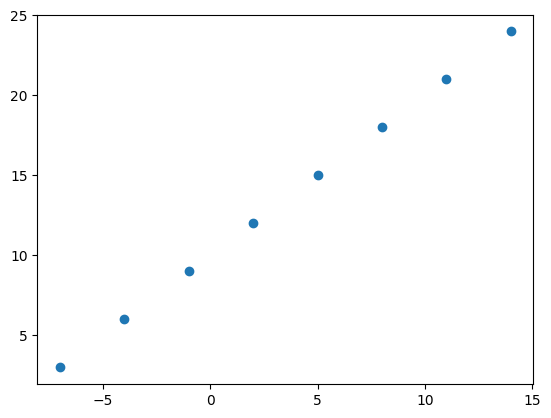

In [8]:
plt.scatter(X, Y)

## Steps in modelling with tensorflow

1. Creating a model - define the input and output layers, as well as hidden layers of a deep learning model
2. Compiling the model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. Fitting the model - letting the model to try to find patterns between X & Y (features and labels)

In [9]:
# Set the random seed
tf.random.set_seed(42)

In [10]:
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 13.7580 - mae: 13.7580
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 13.6631 - mae: 13.6631
Epoch 3/5
1/1 [==============================] - 0s 23ms/step - loss: 13.5676 - mae: 13.5676
Epoch 4/5
1/1 [==============================] - 0s 23ms/step - loss: 13.5078 - mae: 13.5078
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 13.4370 - mae: 13.4370


In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 188ms/step


array([[1.0020062]], dtype=float32)

## Imporving our model

we can improve our model, by altering the steps we took to create a model

2. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization fucntion or perhaps the **learning rate** of the optimazation function.
3. **Fitting a model** - here we might fit a mdoel for more **epochs** (leave it training for longer) or on more date (give more examples to learn from).

In [12]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 349ms/step - loss: 8.6853 - mae: 8.6853
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 8.5528 - mae: 8.5528
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 8.4203 - mae: 8.4203
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2878 - mae: 8.2878
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1553 - mae: 8.1553
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.0228 - mae: 8.0228
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.8903 - mae: 7.8903
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.7578 - mae: 7.7578
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.6253 - mae: 7.6253
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4928 - mae: 7.4928
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 7

In [13]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
model.predict([-7.0])

1/1 [==============================] - 0s 85ms/step


array([[-11.304388]], dtype=float32)

In [15]:
# Let's see if we can make another model to improve it

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.7364 - mae: 13.7364
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9401 - mae: 12.9401
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1445 - mae: 12.1445
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4421 - mae: 11.4421
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.8969 - mae: 10.8969
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.3391 - mae: 10.3391
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.7711 - mae: 9.7711
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.1836 - mae: 9.1836
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.5783 - mae: 8.5783
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.9527 - mae: 7.9527
Epoch 11/100
1/1 [==============================] - 0s 12ms/

In [16]:
model.predict([10.0])

1/1 [==============================] - 0s 72ms/step


array([[20.134098]], dtype=float32)

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               200       
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model...
```


from os import GRND_NONBLOCK
When it comes to evaluation... there are three words you should memorize:
"Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [27]:
 # Make a bigger dataset
X = tf.range(-100, 100, 3)
X

<tf.Tensor: shape=(67,), dtype=int32, numpy=
array([-100,  -97,  -94,  -91,  -88,  -85,  -82,  -79,  -76,  -73,  -70,
        -67,  -64,  -61,  -58,  -55,  -52,  -49,  -46,  -43,  -40,  -37,
        -34,  -31,  -28,  -25,  -22,  -19,  -16,  -13,  -10,   -7,   -4,
         -1,    2,    5,    8,   11,   14,   17,   20,   23,   26,   29,
         32,   35,   38,   41,   44,   47,   50,   53,   56,   59,   62,
         65,   68,   71,   74,   77,   80,   83,   86,   89,   92,   95,
         98], dtype=int32)>

In [28]:
y = X + 10
y

<tf.Tensor: shape=(67,), dtype=int32, numpy=
array([-90, -87, -84, -81, -78, -75, -72, -69, -66, -63, -60, -57, -54,
       -51, -48, -45, -42, -39, -36, -33, -30, -27, -24, -21, -18, -15,
       -12,  -9,  -6,  -3,   0,   3,   6,   9,  12,  15,  18,  21,  24,
        27,  30,  33,  36,  39,  42,  45,  48,  51,  54,  57,  60,  63,
        66,  69,  72,  75,  78,  81,  84,  87,  90,  93,  96,  99, 102,
       105, 108], dtype=int32)>

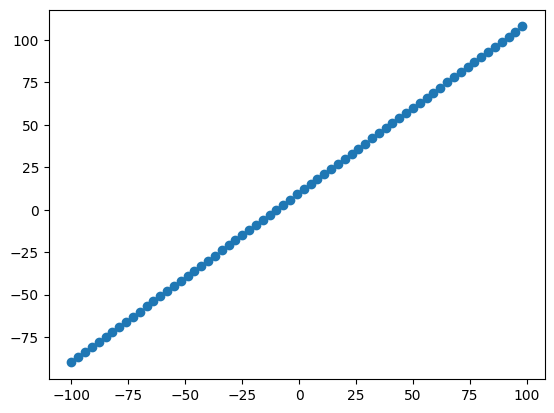

In [29]:
# plot the data
plt.scatter(X, y)

### The 3 sets of data...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available
* Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [30]:
# Check the length of how many samples we have
len(X)

67

In [33]:
# Split the data into train and test sets
X_train = X[:55]
y_train = y[:55]

X_test = X[55:]
y_test = y[55:]

len(X_train), len(X_test), len(y_train), len(y_test)

(55, 12, 55, 12)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

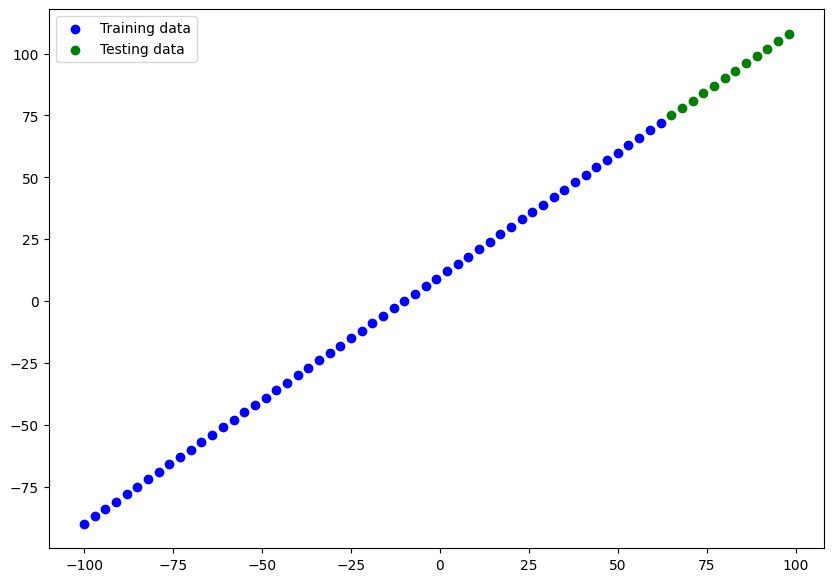

In [35]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show the legend
plt.legend()

In [38]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

# 3. Train the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 2s 15ms/step - loss: 2417.4065
Epoch 2/500
2/2 [==============================] - 0s 15ms/step - loss: 1558.4280
Epoch 3/500
2/2 [==============================] - 0s 23ms/step - loss: 936.9028
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 450.1235
Epoch 5/500
2/2 [==============================] - 0s 13ms/step - loss: 211.9734
Epoch 6/500
2/2 [==============================] - 0s 15ms/step - loss: 109.6249
Epoch 7/500
2/2 [==============================] - 0s 14ms/step - loss: 115.0057
Epoch 8/500
2/2 [==============================] - 0s 17ms/step - loss: 170.6195
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 237.6217
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 272.6896
Epoch 11/500
2/2 [==============================] - 0s 14ms/step - loss: 269.9817
Epoch 12/500
2/2 [==============================] - 0s 12ms/step - loss: 236.3984
Epoch 13/500
2/2 [=====

In [39]:
model.predict([10.0])

1/1 [==============================] - 0s 136ms/step


array([[19.999992]], dtype=float32)

In [79]:
from os import name
# Let's create a model which builds automatically by defining the input_shape argument in the first layer in the model.

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name='my_model')

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mse"])

In [64]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
# 3. Fit the model (again same as above)
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

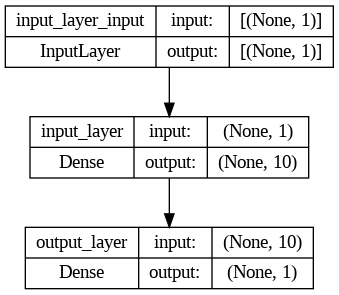

In [76]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model predictions

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [96]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 20ms/step


array([[ 75.02844 ],
       [ 78.03169 ],
       [ 81.034935],
       [ 84.038185],
       [ 87.04143 ],
       [ 90.04467 ],
       [ 93.04792 ],
       [ 96.05117 ],
       [ 99.05441 ],
       [102.057655],
       [105.0609  ],
       [108.06414 ]], dtype=float32)

In [98]:
y_test

<tf.Tensor: shape=(12,), dtype=int32, numpy=
array([ 75,  78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108],
      dtype=int32)>

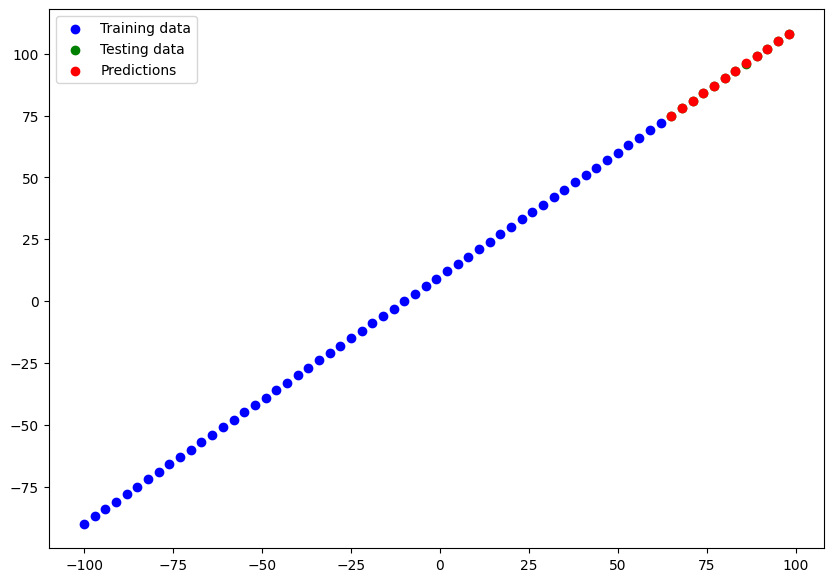

In [99]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()
  # Show the plot
  plt.show()

plot_predictions( X_train, y_train, X_test, y_test, y_pred)


### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* Mean absolute error (MAE) - the mean absolute error : the average of the absolute differences between predictions and actual values.
* Mean squared error (MSE) - the mean squared error : the average of the squared differences between predictions and actual values

In [100]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 130ms/step - loss: 0.0023 - mse: 0.0023


[0.002268815180286765, 0.002268815180286765]

In [101]:
tf.keras.losses.mae(y_test, y_pred)

<tf.Tensor: shape=(12,), dtype=float32, numpy=
array([16.476297 , 13.978871 , 11.9825325, 10.487271 ,  9.493095 ,
        9.       ,  9.007987 ,  9.517056 , 10.527206 , 12.038437 ,
       14.050748 , 16.56414  ], dtype=float32)>